<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2/2 [==============================] - 0s 3ms/step
The year having anomaly is:  2020
The year having anomaly is:  1979
The year having anomaly is:  1965


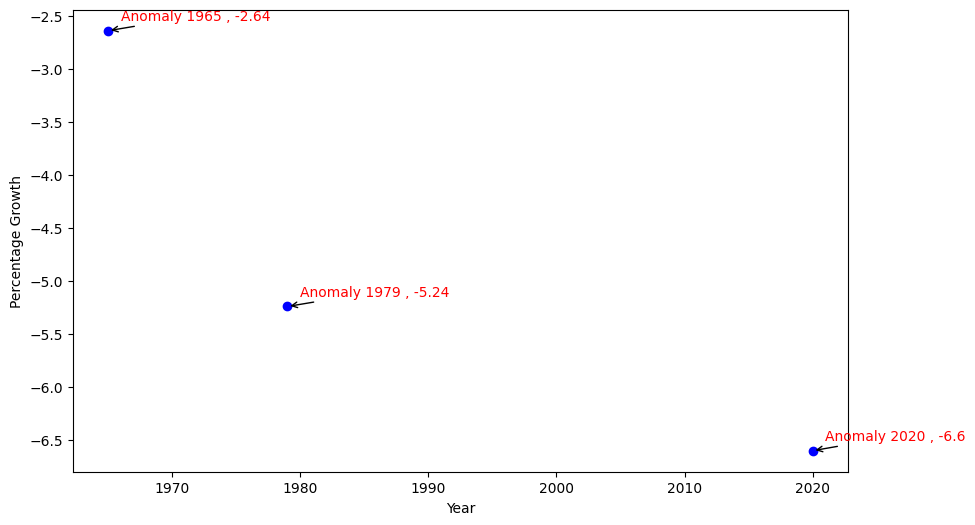

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data from the CSV file
df = pd.read_csv('/content/India_GDP_Data.csv')

# Extract the percentage GDP growth column as a numpy array
series = df['Percentage_Growth '].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series.reshape(-1, 1))

# Define the number of time steps and features
n_steps = 1
n_features = 1

# Convert the time series into a supervised learning problem
def create_dataset(X, y, n_steps):
    Xs, ys = [], []
    for i in range(len(X) - n_steps):
        Xs.append(X[i:i + n_steps])
        ys.append(y[i + n_steps])
    return np.array(Xs), np.array(ys)

X, y = create_dataset(series, series[:, 0], n_steps)

# Define the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model on the entire dataset
model.fit(X, y, epochs=200, verbose=0)

# Predict the values for the entire dataset
y_pred = model.predict(X)

# Calculate the mean and standard deviation of the predicted values
y_pred_mean = y_pred.mean()
y_pred_std = y_pred.std()

# Any data point that deviates significantly from the mean could be considered an anomaly.
# Try different values of standard deviation or use other methods like IQR or Z-score
anomalies = np.where(np.abs(y - y_pred_mean) > 5 * y_pred_std)[0]

# Get the index values (years) of the anomalies
anomaly_indices = [i + n_steps for i in anomalies]

# Print the years with anomalies as "2022-{year}"
for index in anomaly_indices:
 print("The year having anomaly is: ", df['Year'][index])

import matplotlib.pyplot as plt

# Create a scatter plot of the anomalies
plt.figure(figsize=(10, 6))
for index in anomaly_indices:
   anomaly_value = df.loc[index, 'Percentage_Growth ']
   plt.scatter(df['Year'][index], anomaly_value, color='blue')
   # Add a label to the anomaly point
   plt.annotate(f'Anomaly {df["Year"][index]} , {df["Percentage_Growth "][index]}', xy=(df['Year'][index], anomaly_value), xytext=(df['Year'][index]+1, anomaly_value+0.1), fontsize=10, color='red', arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.show()


